In [160]:
import pandas as pd
import geopandas as gpd 
import matplotlib as mpl
import matplotlib.pyplot as plt

In [161]:
times = ['900', '1200', '1400']

# Create Difference Tables for Analysis

In [178]:
DA_shp = gpd.read_file('/Users/shivyucel/Documents/projects.nosync/opioid_accessibility/project/project_dir/data/toronto_data/toronto_shapes/DA_geometries/DA_shp.shp')
DA_shp['GeoUID'] = DA_shp['GeoUID'].astype(int)

difference_dic  = {}
DA_shp_dic = {}
times = ['900', '1200', '1400']
for time in times:
    tt_2019 = pd.read_csv(f'/Users/shivyucel/Documents/projects.nosync/opioid_accessibility/project/project_dir/data/toronto_data/2019_routing/travel_times/26_06_2019_{time}.csv')
    tt_2020 = pd.read_csv(f'/Users/shivyucel/Documents/projects.nosync/opioid_accessibility/project/project_dir/data/toronto_data/2020_routing/travel_times/24_06_2020_{time}.csv')
    
    
    #get travel time to nearest clinics 
    min_2019 = tt_2019.loc[tt_2019.groupby('fromId').travel_time.idxmin()]
    min_2020 = tt_2020.loc[tt_2020.groupby('fromId').travel_time.idxmin()]

    #filter out all regions whose closest clinic changed or who were over 2 hours from nearest clinic
    #min_travel_time = pd.merge(min_2019, min_2020, how='inner', on=['fromId', 'toId'])


    #merge 2019 and 2020 travel times
    min_compare = min_2019.merge(min_2020, on='fromId')
    min_compare.rename(columns={'travel_time_x': 'tt_2019', 'travel_time_y': 'tt_2020'}, inplace=True)
    min_compare.drop('toId_y', axis=1, inplace=True)    


    #get difference between 2019 and 2020 travel times
    min_compare['diff'] = min_compare['tt_2020'] - min_compare['tt_2019']



    min_compare = min_compare.merge(DA_shp[['GeoUID', 'geometry']], left_on='fromId', right_on='GeoUID')
    min_compare = gpd.GeoDataFrame(min_compare, geometry='geometry')

    #get plot of all DA regions captured by analysis to plot behind regions which changed negatively
    min_compare_union = min_compare['geometry'].unary_union
    
    #DA_shp['within'] = [True if x.within(min_compare_union) else False for x in DA_shp['geometry'] ]
    #DA_within = DA_shp[DA_shp['within']==True]
    #DA_shp_dic[time] = DA_within

    #get regions with lower access in 2020 versus 2019
    min_compare['neg_access'] = min_compare['diff'] >= 0

    min_compare.to_file(f'/Users/shivyucel/Documents/projects.nosync/opioid_accessibility/project/project_dir/data/toronto_data/results/DA_level/time_diff_{time}.shp')
    

# Load in Difference Tables for Analysis

In [179]:
for time in times:
     difference_dic[time] = gpd.read_file(f'/Users/shivyucel/Documents/projects.nosync/opioid_accessibility/project/project_dir/data/toronto_data/results/DA_level/time_diff_{time}.shp')

/Users/shivyucel/anaconda3/envs/geo_env/lib/python3.9/site-packages/geopandas/plotting.py:644: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


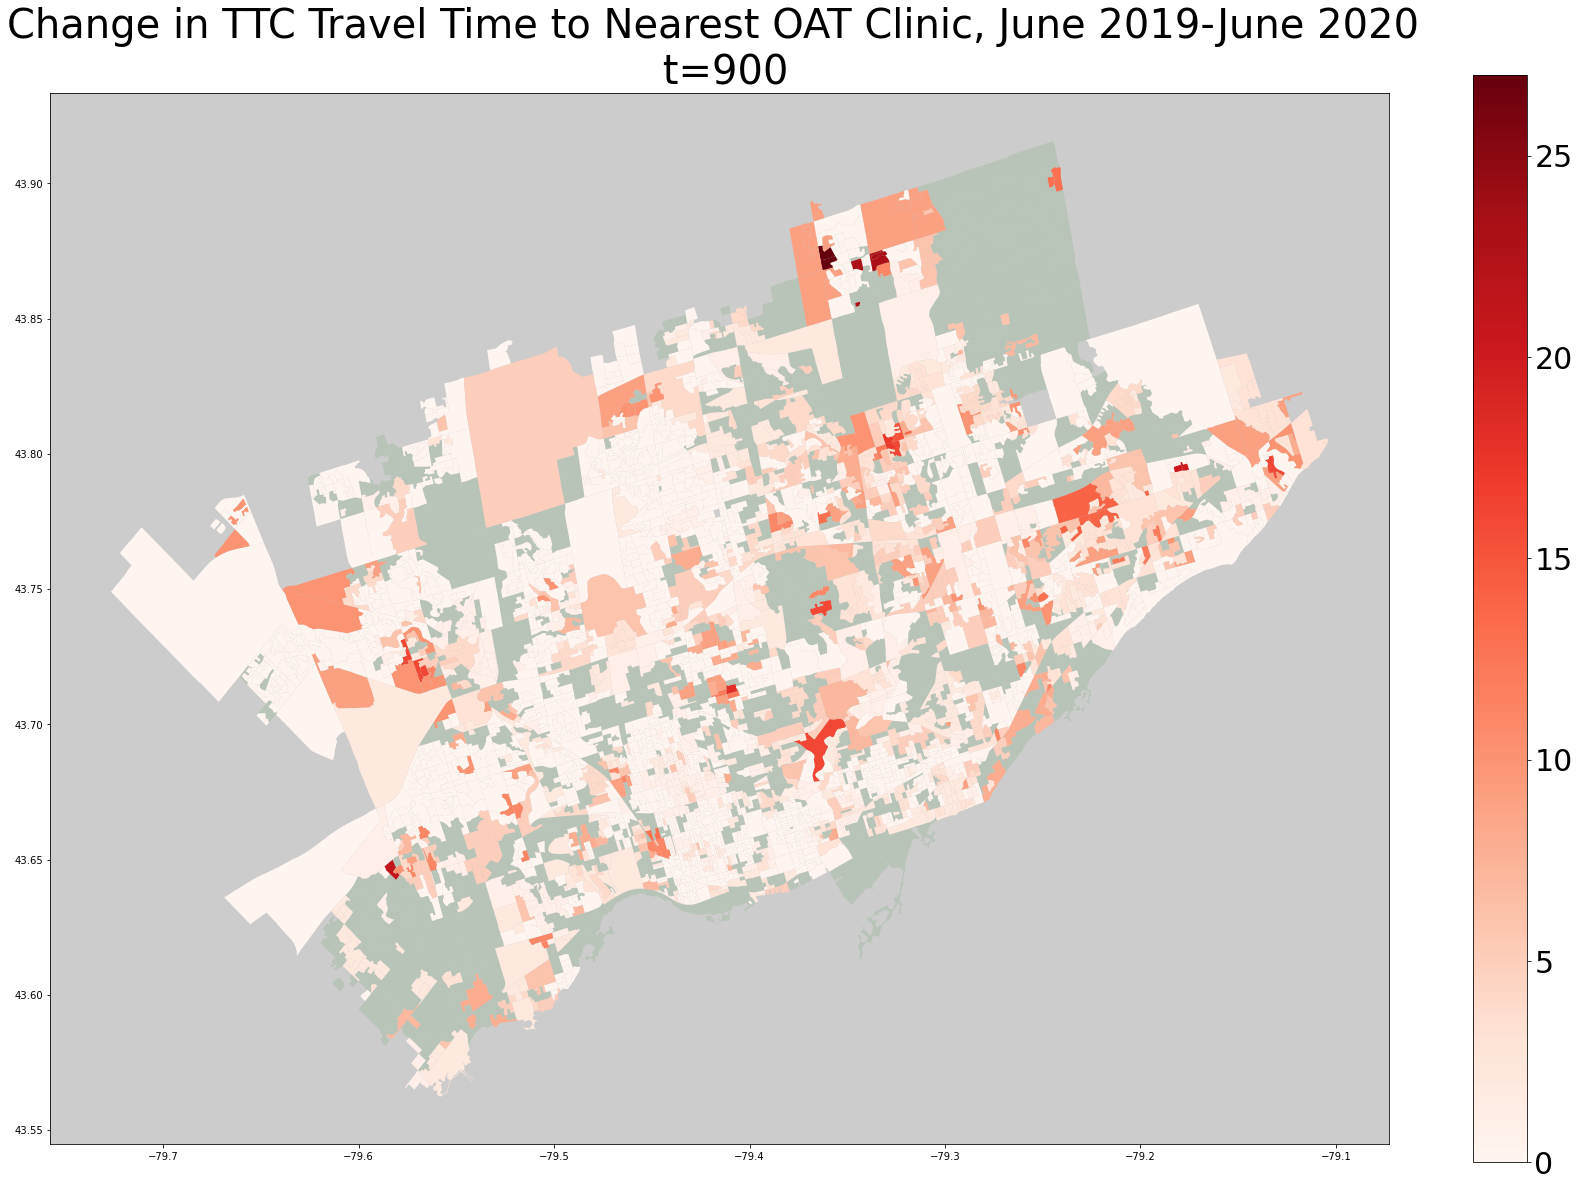

In [181]:
time = '900'
fig, ax = plt.subplots(figsize=(30, 20))
difference_dic[time][difference_dic[time]['neg_access']==False].plot(column='diff', ax=ax, legend=True, color='green', alpha=0.1)
difference_dic[time][difference_dic[time]['neg_access']==True].plot(column='diff', ax=ax, legend=True, cmap='Reds')
cb_ax = fig.axes[1]
ax.patch.set_facecolor('black')
ax.patch.set_alpha(0.2)
plt.title(f"Change in TTC Travel Time to Nearest OAT Clinic, June 2019-June 2020 \n t={time}", fontsize=40)
cb_ax.tick_params(labelsize=30)

/Users/shivyucel/anaconda3/envs/geo_env/lib/python3.9/site-packages/geopandas/plotting.py:644: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


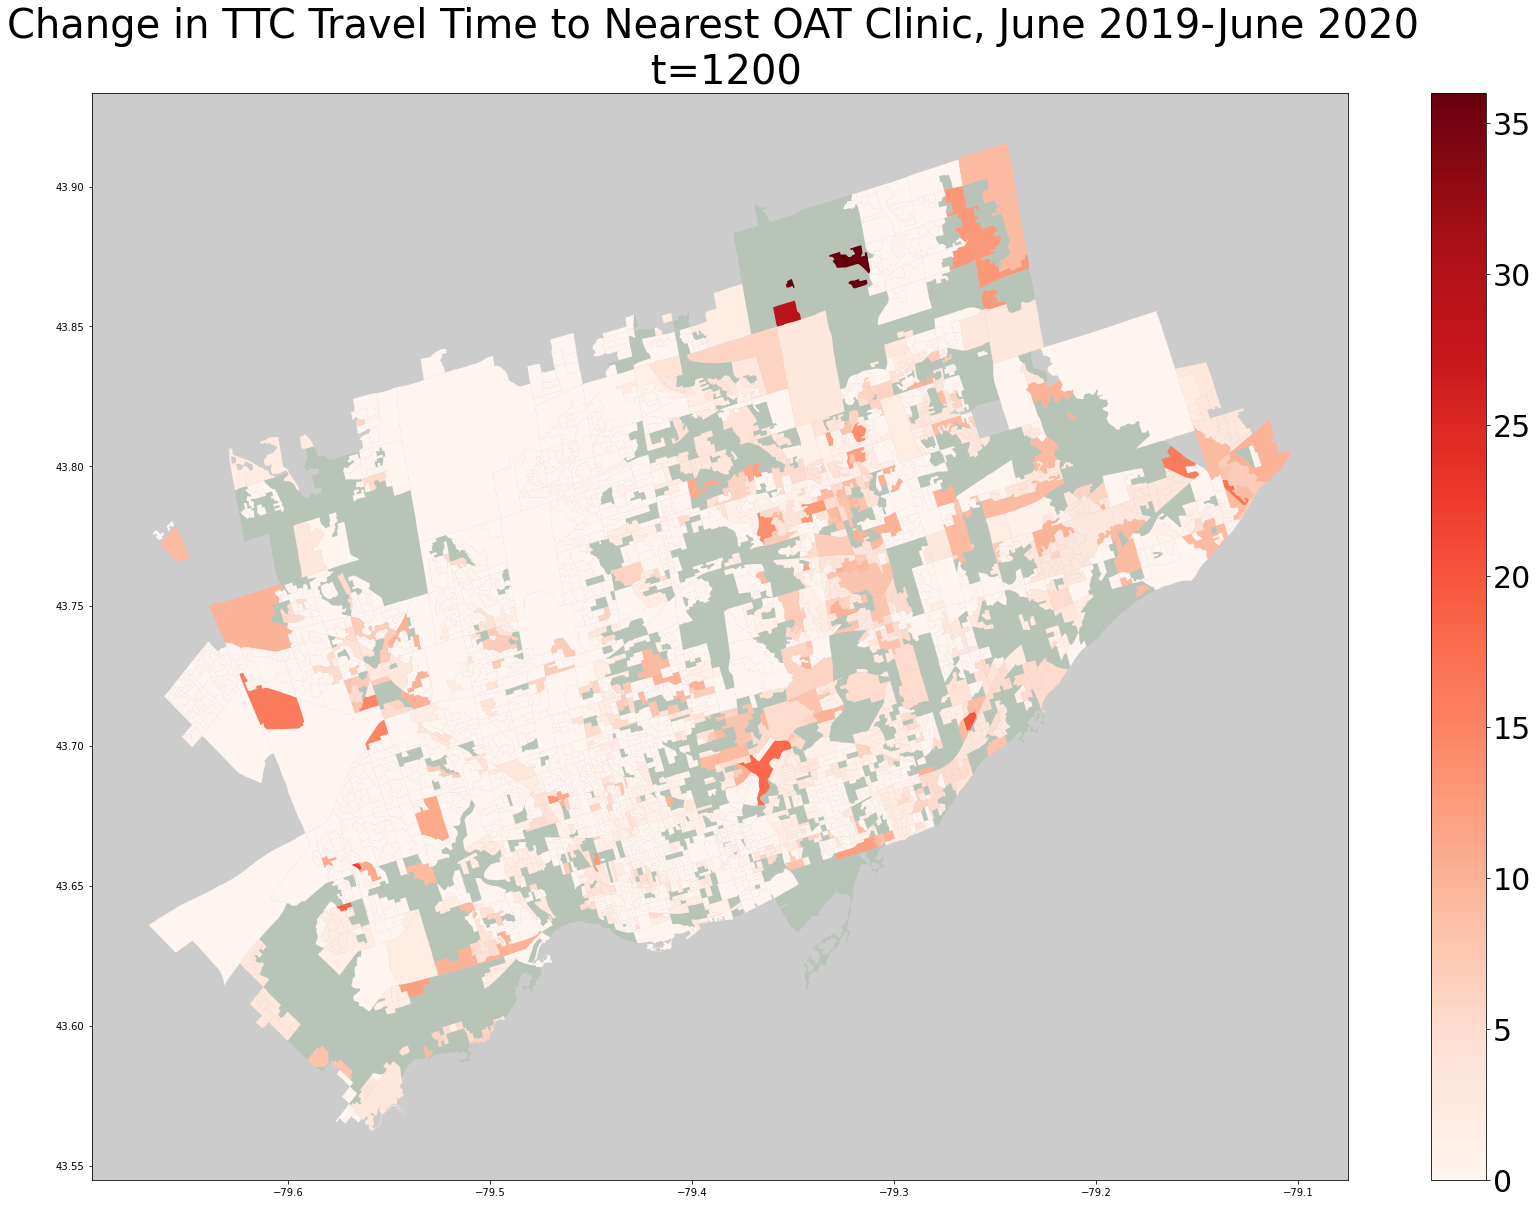

In [182]:
time = '1200'
fig, ax = plt.subplots(figsize=(30, 20))
difference_dic[time][difference_dic[time]['neg_access']==False].plot(column='diff', ax=ax, legend=True, color='green', alpha=0.1)
difference_dic[time][difference_dic[time]['neg_access']==True].plot(column='diff', ax=ax, legend=True, cmap='Reds')
cb_ax = fig.axes[1]
ax.patch.set_facecolor('black')
ax.patch.set_alpha(0.2)
plt.title(f"Change in TTC Travel Time to Nearest OAT Clinic, June 2019-June 2020 \n t={time}", fontsize=40)
cb_ax.tick_params(labelsize=30)

/Users/shivyucel/anaconda3/envs/geo_env/lib/python3.9/site-packages/geopandas/plotting.py:644: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


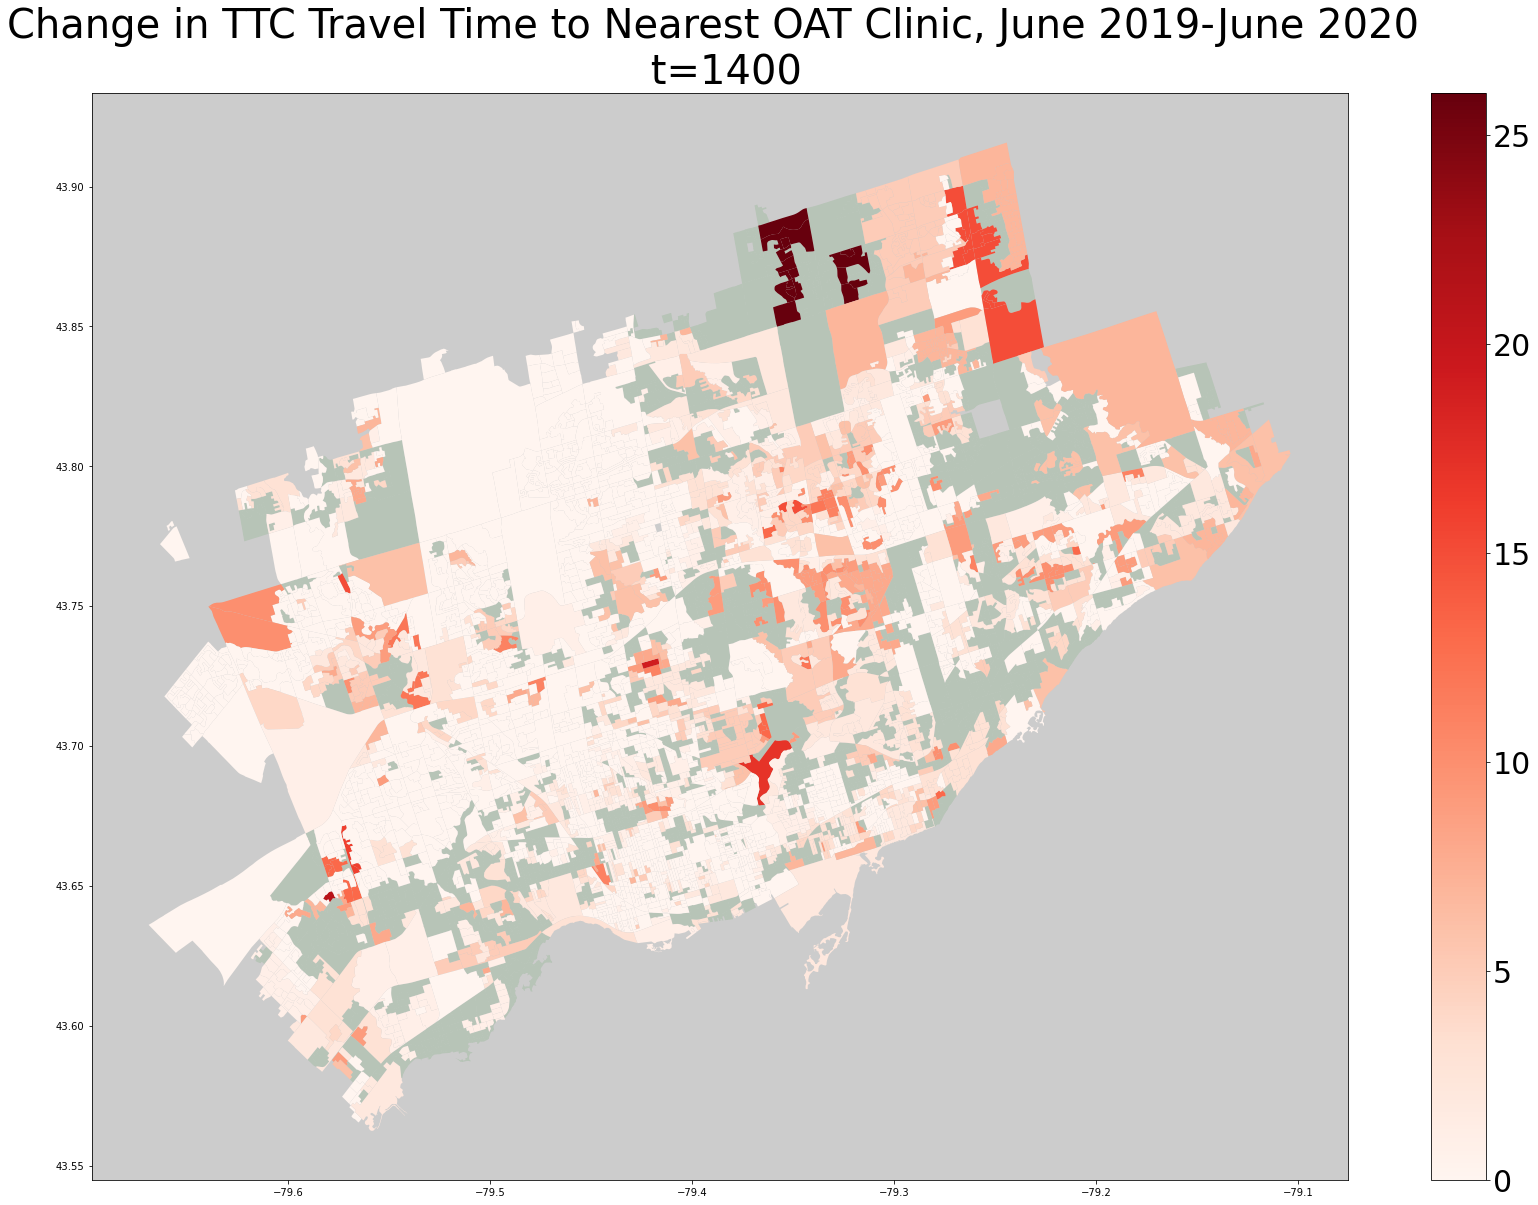

In [183]:
time = '1400'
fig, ax = plt.subplots(figsize=(30, 20))
difference_dic[time][difference_dic[time]['neg_access']==False].plot(column='diff', ax=ax, legend=True, color='green', alpha=0.1)
difference_dic[time][difference_dic[time]['neg_access']==True].plot(column='diff', ax=ax, legend=True, cmap='Reds')
cb_ax = fig.axes[1]
ax.patch.set_facecolor('black')
ax.patch.set_alpha(0.2)
plt.title(f"Change in TTC Travel Time to Nearest OAT Clinic, June 2019-June 2020 \n t={time}", fontsize=40)
cb_ax.tick_params(labelsize=30)